# VAR/SVAR 模型相關程式

### 簡要Summary

* 編號：v5i4l4-chol

1. 5個變數：隔夜拆款利率、許可建照數、消費者購屋貸款、情緒指數、房價指數

2. Lag = 4

3. Wold Ordering

$$
\left[
\begin{array}{c}
	\varepsilon_t^i\\
	\varepsilon_t^{permit}\\
	\varepsilon_t^{loan}\\
	\varepsilon_t^{sentiment}\\
	\varepsilon_t^{hp}
\end{array}
\right]
=
\left[
\begin{array}{ccccc}
a_{11} &0 &0 &0 &0\\
a_{21} &a_{22} &0 &0 &0\\
a_{31} &a_{32} &a_{33} &0 &0\\
a_{41} &a_{42} &a_{43} &a_{44} &0\\
a_{51} &a_{52} &a_{53} &a_{54} &a_{55}\\
\end{array}
\right]
\left[
\begin{array}{c}
	e_t^{mp}\\
	e_t^{hs}\\
	e_t^{hd}\\
	e_t^{expectation}\\
	e_t^{sp}
\end{array}
\right]
$$

### 環境設定

In [1]:
# 設定路徑
#Path = "/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R"
#setwd(Path)
source("code/VAR_functions.R")           # 讀取 VARsource.R 檔

#inv_tol = 1e-20 #求反矩陣時做數值運算允許的最小誤差(避免singular matrix)
inv_tol = 1e-22

─ Attaching packages ──────────────────── tidyverse 1.3.0 ─

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()

Loading required package: matrixcalc

Loading required package: lattice



In [2]:
#options(warn=-1)    # 關掉warning
options(warn=0)
options(scipen=999) #不要科學記號

### 讀資料

In [3]:
###### 讀取資料 ######
file = "data/df.csv"
data = read.csv(file = file, header = TRUE)
data = na.omit(data)
# 5-variable model
By <- data %>% select(interest_rate, permit, loan, Sentiment, hp) %>% as.matrix
# Sentiment排在最後的認定條件

### 模型設定

In [4]:
#----- 模型設定 -----#
VAR.P = 2                       # 最大的落後項數
CONST = TRUE                    # 是否有常數項
Y     = VAR.Y(By, VAR.P)        # 設定 Y
X     = VAR.X(By, VAR.P)        # 設定 X

## Reduced Form VAR

In [5]:
###### 參數估計 ######
(Coef.OLS    = VAR.OLS(Y, X, CONST)                  )
(Sigma.OLS   = VAR.Sigma.OLS(Y, X, Coef.OLS, CONST)  )
(Sigma.MLE   = VAR.Sigma.MLE(Y, X, Coef.OLS, CONST))

0.722058306,-0.0000077344149,0.000000277829897,16.1278619,0.00115407408,0.192222893,-0.000007395526,-0.000000363082461,5.9359668,0.00325782519,0.04130478
406.930007871,0.6041224972876,-0.000687786593161,35859.9555542,60.18088222401,-626.672038325,0.257607672938,0.000415937819106,-34545.4403102,-50.08258361152,3159.17262729
13805.983050834,12.1399842546161,1.623707737356170,3512646.8905859,930.14846058772,-18184.914874524,-8.019444910227,-0.621095069333307,-2128914.0580230,-988.58868179843,-1386.72599387
-0.001503781,0.0000003946027,0.000000008809227,0.6282233,-0.00007606962,0.001107574,0.000000117841,-0.000000008071463,-0.1146121,0.00002357842,0.00437145
-0.476922612,0.0001058876296,-0.000002792079375,65.0077335,1.27415504650,-0.135157323,0.000369176349,0.000003365392898,-152.3861634,-0.31222660761,0.54451478


0.2069104800,7.009556,2700.39882,0.00038324280,0.014924823
7.0095563051,1237954.623902,8541160.74626,1.10909919865,1145.978383741
2700.3988195915,8541160.746259,5136722121.20931,25.08305540896,-4208.777428270
0.0003832428,1.109099,25.08306,0.00002686865,0.008086113
0.0149248230,1145.978384,-4208.77743,0.00808611312,12.699964384


0.1874573580,6.350538,2446.51517,0.00034721142,0.01352163
6.3505381909,1121565.727638,7738145.63336,1.00482491501,1038.23682630
2446.5151698863,7738145.633363,4653782434.59989,22.72481943034,-3813.08040510
0.0003472114,1.004825,22.72482,0.00002434254,0.00732588
0.0135216345,1038.236826,-3813.08041,0.00732588026,11.50595064


### AIC/SIC

In [6]:
#----- 資訊準則 -----#
A0.Mat = matrix(1, 3, 7)
(SIC = VAR.IC(Sigma.MLE, A0.Mat, T)$SIC              )

(IC = VAR.Select(By, Max.lag = 4, CONST)             )
apply(IC, 1, which.min)

[1] 25.97448

AIC,27.54207,26.91465,26.91336,26.83078
SIC,28.24648,28.21311,28.81238,29.33702
HQ,27.82808,27.44181,27.68425,27.84805


AIC SIC  HQ 
  4   2   2

In [7]:
VAR.P=4

# SVAR

## Identification

$$
\left[
\begin{array}{c}
	\varepsilon_t^i\\
	\varepsilon_t^{permit}\\
	\varepsilon_t^{loan}\\
	\varepsilon_t^{sentiment}\\
	\varepsilon_t^{hp}
\end{array}
\right]
=
\left[
\begin{array}{ccccc}
a_{11} &0 &0 &0 &0\\
a_{21} &a_{22} &0 &0 &0\\
a_{31} &a_{32} &a_{33} &0 &0\\
a_{41} &a_{42} &a_{43} &a_{44} &0\\
a_{51} &a_{52} &a_{53} &a_{54} &a_{55}\\
\end{array}
\right]
\left[
\begin{array}{c}
	e_t^{mp}\\
	e_t^{hs}\\
	e_t^{hd}\\
	e_t^{expectation}\\
	e_t^{sp}
\end{array}
\right]
$$

In [8]:
### 5-variable model

Amat = diag(5)
# Identification Conditions

Amat[2,1]  = NA; 
Amat[3,1]  = NA; Amat[3,2]  = NA;
Amat[4,1]  = NA; Amat[4,2]  = NA; Amat[4,3]  = NA;
Amat[5,1]  = NA; Amat[5,2]  = NA; Amat[5,3]  = NA; Amat[5,4]  = NA;

Bmat = diag(5)
diag(Bmat) = NA

Amat;Bmat

1,0,0,0,0
NA,1,0,0,0
NA,NA,1,0,0
NA,NA,NA,1,0
NA,NA,NA,NA,1


NA,0,0,0,0
0,NA,0,0,0
0,0,NA,0,0
0,0,0,NA,0
0,0,0,0,NA


## 估計 $\hat{A} , \hat{B}$

* Recall 模型設定:

$$D(L)Y_t = Be_t$$

可以推得:

$$Y_t = \Phi_1 Y_{t-1} + \dots + \Phi_p Y_{t-p} + \varepsilon_t $$

1. 為 $A, B$ matrix 加上 zero constraints

2. 從$\Sigma_\varepsilon = CC'$知道 cholesky decomposition的 $C = (I-D_0)^{-1}B = A^{-1}B$ 

In [9]:
C.Prime <- chol(Sigma.OLS)

In [10]:
C <- t(C.Prime)
C

0.4548741365,0.0000000000,0.0000000000,0.000000000,0.000000
15.4098809830,1112.5273747061,0.0000000000,0.000000000,0.000000
5936.5846575057,7595.0299069936,71019.6775867467,0.000000000,0.000000
0.0008425249,0.0009852486,0.0001773923,0.005015638,0.000000
0.0328108850,1.0296131115,-0.1721143325,1.410503804,3.101555


令 

$$
A = \left[
\begin{array}{ccccc}
1 &0 &0 &0 &0\\
a_{21} &1 &0 &0 &0\\
a_{31} &a_{32} &1 &0 &0\\
a_{41} &a_{42} &a_{43} &1 &0\\
a_{51} &a_{52} &a_{53} &a_{54} &1\\
\end{array}
\right]
$$

$$
B = \left[
\begin{array}{ccccc}
\sigma_1 &0 &0 &0 &0\\
0 &\sigma_2 &0 &0 &0\\
0 &0 &\sigma_3 &0 &0\\
0 &0 &0 &\sigma_4 &0\\
0 &0 &0 &0 &\sigma_5\\
\end{array}
\right]
$$

### Note: Solving system of linear equations

由於 $B, C$已知，又$AC = B$，故$A = BC^{-1}$

In [11]:
B0 <- diag(diag(C), ncol = 5, nrow = 5)
B0

0.4548741,0.000,0.00,0.000000000,0.000000
0.0000000,1112.527,0.00,0.000000000,0.000000
0.0000000,0.000,71019.68,0.000000000,0.000000
0.0000000,0.000,0.00,0.005015638,0.000000
0.0000000,0.000,0.00,0.000000000,3.101555


In [12]:
A0 <- B0 %*% solve(C)
A0

1.000000000,0.0000000000000,0.000000000000000,0.0000,0.0000000000000000000000000
-33.877241522,1.0000000000000,0.000000000000000,0.0000,0.0000000000000000000000000
-12819.775024439,-6.8268251907061,1.000000000000000,0.0000,0.0000000000000000000000000
-0.001790193,-0.0000008685429,-0.000000002497791,1.0000,0.0000000000000000003947863
0.431592508,-0.0006977640863,0.000003125905601,-281.2212,0.9999999999999998889776975


In [13]:
SVAR_AB_est <- list("A0.svar" = A0, "B0.svar" = B0)

## IRF (without Bootstrap C.I.)

In [14]:
### IRF
SVAR_AB_IRF <- VAR.svarirf.AB(By, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)


# 5*5個圖的time series
df_IRF_plot <- matrix(NA, 120, 25) #%>% as.tibble()
#dim(df_IRF_plot)
h <- 0 # h表示第幾期的IRF
for(period in SVAR_AB_IRF){
  k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
  h <- h+1 # h表示第幾期的IRF
  for(j in 1:5){
    for(i in 1:5){
      k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
      df_IRF_plot[h,k] <- period[i,j]
    }
  }
}
df_IRF_plot <- df_IRF_plot %>% as_tibble()

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [15]:
p1 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V1))
p2 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V2))
p3 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V3))
p4 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V4))
p5 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V5))
p6 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V6))
p7 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V7))
p8 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V8))
p9 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V9))
p10 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V10))
p11 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V11))
p12 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V12))
p13 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V13))
p14 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V14))
p15 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V15))
p16 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V16))
p17 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V17))
p18 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V18))
p19 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V19))
p20 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V20))
p21 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V21))
p22 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V22))
p23 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V23))
p24 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V24))
p25 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V25))

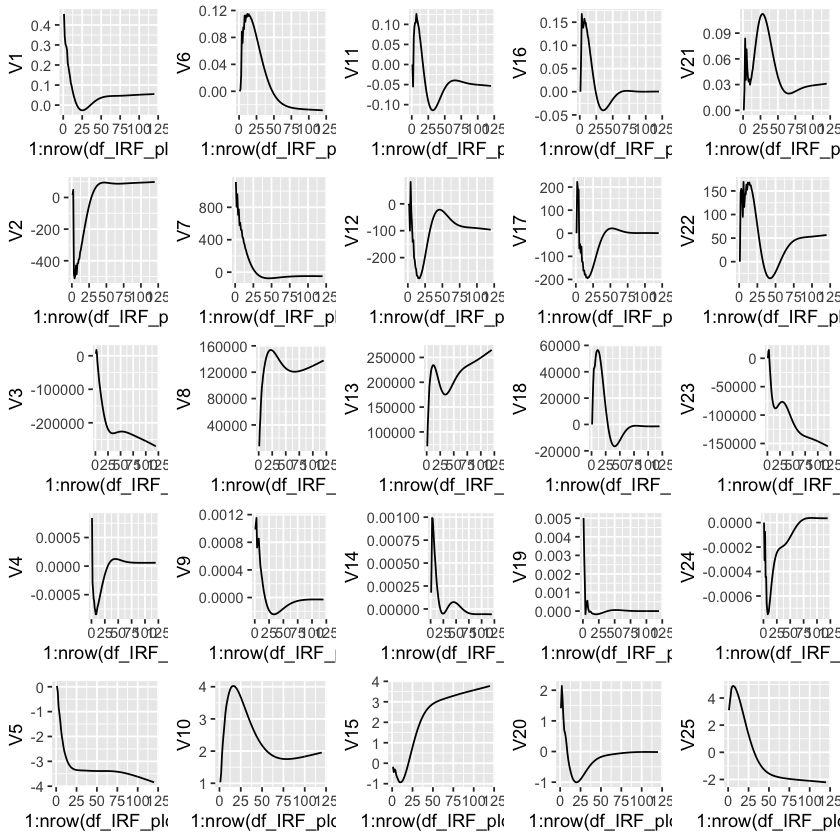

In [16]:
multiplot(p1,p2,p3,p4,p5,
          p6,p7,p8,p9,p10,
          p11,p12,p13,p14,p15,
          p16,p17,p18,p19,p20,
          p21,p22,p23,p24,p25,
          cols = 5)

## IRF (Bootstrap C.I.)

Steps:

1. 從殘差取後放回重抽T個

2. 從估計值加上重抽的T個殘差，得到5條 period為T的pseudo time series

3. 從pseudo time series再估SVAR及IRF

    a. 估的時候是固定已經得到的 $\hat{A}, \hat{B}$ matrix來計算IRF
    
    b. 估的條件相似，是當重抽一組residual並得到pseudo time series後，一樣要 $se(\hat{A}), se(\hat{B})$ 存在才算進一個bootstrap statistics
    
    c. 停止條件是蒐集到1000條

4. 從IRF的2.5% quantile跟97.5%quantile找到IRF的95% C.I.

存法：用arrary：

1. row數為總期間減去lag期數

2. column數為變數總數的平方（shock1對y1,..., shock5對y5）

3. page數為Bootstrap重複的次數

In [17]:
#```R
lower = 0.025                                        # 控制成 95% CI
upper = 1-lower
kk = ncol(By)
ddY = VAR.ddY(By, VAR.P)
ddX = VAR.ddX(By, VAR.P)

# dim(ddY); dim(ddX)

T   = nrow(ddY)
T.total= nrow(By)
Ik  = diag(rep(1, kk))
# 16 coef if 4 variables; 55 coef if 5 variables
Coef = t(VAR.EbyE(ddY, ddX, CONST)$ddA)              # Step 1 估計模型
# residuals
U    = VAR.EbyE(ddY, ddX, CONST)$ddU
BSigma.u = VAR.ddSigma.OLS(ddY, ddX, CONST)
if(CONST == TRUE){
  const = Coef[, ncol(Coef)]
  Coef.noc= Coef[,-ncol(Coef)]                      # 刪掉 const
}else{
  const = matrix(0, kk, 1)
  Coef.noc = Coef
}

Theta.unit= VAR.Theta(Coef, h, BSigma.u, CONST)$unit # 估算 Theta.unit
Theta.std = VAR.Theta(Coef, h, BSigma.u, CONST)$std  # 估算 Theta.std

# dm.U <- U-mean(U)
dm.U <- U

N = 1000 #重抽次數
Theta.unit.sim = vector("list", N)
Theta.std.sim  = vector("list", N)

dim(ddX); dim(Coef.noc); dim(dm.U)


# 存N次重抽的IRF
df_IRF.sim <- array(NA, c(120,kk^2,N)) #dimensions are: Time Period, Number of shock interacts with variables, page (number of Bootstrap resamplings)
counter <- 1
while(TRUE){

  #cat("Now, there are ", counter-1, " sets of resamples.\n")
  Y.sim = matrix(0, nrow = T.total, ncol = kk)          # Y.sim = 0 #pseudo time series
  Y.sim[c(1:VAR.P),] = By[c(1:VAR.P), ] #initial values

  boot.number = sample(c(1:T), replace = TRUE)      # Step 3 取出放回
  U.sim = dm.U[boot.number,]

    # predicted values given the above initial values
    last.y= c(t(By[VAR.P:1,]))
    for(ii in 1:T){
         last.y = last.y[1:(kk*VAR.P)]
         Y.sim[ii+VAR.P, ] = Coef.noc %*% last.y + const + U.sim[ii,]      # Step 4 模擬資料
         last.y = c(Y.sim[ii+VAR.P,], last.y)
      }
  
#   Y.sim[-c(1:VAR.P),] <- matrix(const, nrow = T.total-VAR.P, ncol = kk, byrow = T) + ddX %*% t(Coef.noc) + U.sim
  
    
  #`Y.sim` is the pseudo time series
  # Step 5 重新估算SVAR
  
  ### SVAR.sim Start ###

    Y_pseudo     = VAR.Y(Y.sim, VAR.P)        # 設定 Y
    X_pseudo     = VAR.X(Y.sim, VAR.P)        # 設定 X
    Coef.OLS_pseudo    = VAR.OLS(Y_pseudo, X_pseudo, CONST)
    Sigma.OLS_pseudo   = VAR.Sigma.OLS(Y_pseudo, X_pseudo, Coef.OLS_pseudo, CONST)
    C.Prime_pseudo <- chol(Sigma.OLS_pseudo)
    C_pseudo <- t(C.Prime_pseudo)
    B0_pseudo <- diag(diag(C_pseudo), ncol = 5, nrow = 5)
    A0_pseudo <- B0_pseudo %*% solve(C_pseudo)
    SVAR_AB_est.sim <- list("A0.svar" = A0_pseudo, "B0.svar" = B0_pseudo)
    SVAR_AB_IRF.sim <- VAR.svarirf.AB(Y.sim, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)#.sim)
    
  # 5*5個圖的time series
  df_IRF_plot.sim <- matrix(NA, 120, kk^2) #%>% as.tibble()
  # df_IRF.sim <- array(1:(120*25*N), c(120,25,N))
  # df_IRF.sim[2,1,1] # slicing
  
  h <- 0 # h表示第幾期的IRF
  for(period in SVAR_AB_IRF.sim){
    k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
    h <- h+1 # h表示第幾期的IRF
    for(j in 1:kk){
      for(i in 1:kk){
        k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
        df_IRF_plot.sim[h,k] <- period[i,j]
      }
    }
  }
  # 把這一次重抽得到的IRF append進`df_IRF.sim`中
  df_IRF.sim[,,counter] <- df_IRF_plot.sim
  ### SVAR.sim Ends ###
  if(counter>=N){
    break
  }
  counter <- counter+1
}
#```

[1] 115  20

[1]  5 20

[1] 115   5

In [18]:
#```R
# Save
saveRDS(df_IRF.sim, file = "df_IRF.sim_v5i4l4-chol.rds")
#```

In [19]:
df_IRF.sim <- read_rds("df_IRF.sim_v5i4l4-chol.rds")

In [20]:
# 看某一頁
head(df_IRF.sim[,,1000])

0.4548741,15.40988,5936.585,0.00084252493,0.03281088,-0.00000000000000007707801,1112.52737,7595.030,0.0009852486,1.0296131,⋯,0.00000000,0.00000,0.00,0.0050156377,1.410504,0.000000000,0.00000,0.00,-0.000000000000000001224451,3.101555
0.2647693,149.14463,14941.826,-0.00074329437,-0.03342325,0.07301977957099629878979,643.90766,20759.253,0.0006817504,0.6439144,⋯,0.09930614,286.50865,26577.97,0.0027459809,2.634315,-0.041401777,99.96232,24966.85,0.000607267899585599356220,3.956872
0.2493691,-311.01902,6082.792,-0.00041081987,-0.21099483,0.11132237082438883879476,712.39239,22321.114,0.0001557707,0.9641068,⋯,0.15689118,305.36404,53370.59,0.0011068069,2.208569,-0.002557527,87.64017,40305.25,0.001375578325025418819152,4.181031
0.1670651,-240.04487,-11027.143,0.00007124256,-0.04519266,0.10228385683083753010525,454.42140,21067.717,-0.0014118254,1.0516944,⋯,0.11839496,155.51006,59422.09,-0.0007835416,1.294033,-0.075049981,40.40518,29292.01,-0.000223649325267988866505,4.244842
0.1751909,-220.97822,-19654.679,0.00007494692,0.03741974,0.09029634186591085909246,181.72455,5347.206,-0.0003414865,0.7747859,⋯,0.13445055,-145.63741,45239.66,0.0005423856,1.077574,-0.029484975,41.44127,24234.38,-0.000432045705065463140921,3.941954
0.1177232,-130.80818,-28482.592,-0.00025585340,-0.27925955,0.06635522290097538300468,56.89082,-16724.717,-0.0004575793,1.0539746,⋯,0.16715012,-58.86358,43386.55,0.0011570443,1.468725,-0.034934171,144.71857,25115.45,-0.000172779048368036566028,3.497477


### 畫IRF & Bootstrap C.I.

In [21]:
df_IRF_plot.BS.L <- matrix(NA, 120, 25)
df_IRF_plot.BS.U <- matrix(NA, 120, 25)
df_IRF_plot.BS.Median <- matrix(NA, 120, 25)
df_IRF_plot.BS.Mean <- matrix(NA, 120, 25)
for(col in 1:25){
  for(row in 1:120){
    df_IRF_plot.BS.L[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.025)
    df_IRF_plot.BS.U[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.975)
    df_IRF_plot.BS.Median[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.5)
    df_IRF_plot.BS.Mean[row,col] <- mean(df_IRF.sim[row,col,])
  }
}

df_IRF_plot.BS.L <- df_IRF_plot.BS.L %>% as_tibble()
df_IRF_plot.BS.U <- df_IRF_plot.BS.U %>% as_tibble()
df_IRF_plot.BS.Median <- df_IRF_plot.BS.Median %>% as_tibble()
df_IRF_plot.BS.Mean <- df_IRF_plot.BS.Mean %>% as_tibble()

In [22]:
ind <- 0
for(i in 1:5){
  for(j in 1:5){
    ind <- ind+1
    nam <- paste("shock", j, "y", i, sep = '')
    assign(nam, bind_cols(df_IRF_plot.BS.L[ind], df_IRF_plot.BS.U[ind],
                          df_IRF_plot.BS.Median[ind], df_IRF_plot.BS.Mean[ind],
                          df_IRF_plot[ind]))
    # 改名
    evalStr <- paste0("colnames(", nam, ") <- c('Lower', 'Upper', 'Median', 'Mean', 'Actual')")
    eval(parse(text=evalStr))
    # 圖層
    evalStr <- paste0("p", ind, " <- ", "ggplot(",nam,") +geom_hline(yintercept=0, color = 'grey')+ geom_line(aes(x = 1:nrow(", nam, "), y = Lower), linetype = 'dashed', col='red')+geom_line(aes(x = 1:nrow(", nam, "), y = Upper), linetype = 'dashed', col='red')+geom_line(aes(x = 1:nrow(", nam, "), y = Actual), col = 'Blue')")
    eval(parse(text=evalStr))
  }
}

New names:
* V1 -> V1...1
* V1 -> V1...2
* V1 -> V1...3
* V1 -> V1...4
* V1 -> V1...5

New names:
* V2 -> V2...1
* V2 -> V2...2
* V2 -> V2...3
* V2 -> V2...4
* V2 -> V2...5

New names:
* V3 -> V3...1
* V3 -> V3...2
* V3 -> V3...3
* V3 -> V3...4
* V3 -> V3...5

New names:
* V4 -> V4...1
* V4 -> V4...2
* V4 -> V4...3
* V4 -> V4...4
* V4 -> V4...5

New names:
* V5 -> V5...1
* V5 -> V5...2
* V5 -> V5...3
* V5 -> V5...4
* V5 -> V5...5

New names:
* V6 -> V6...1
* V6 -> V6...2
* V6 -> V6...3
* V6 -> V6...4
* V6 -> V6...5

New names:
* V7 -> V7...1
* V7 -> V7...2
* V7 -> V7...3
* V7 -> V7...4
* V7 -> V7...5

New names:
* V8 -> V8...1
* V8 -> V8...2
* V8 -> V8...3
* V8 -> V8...4
* V8 -> V8...5

New names:
* V9 -> V9...1
* V9 -> V9...2
* V9 -> V9...3
* V9 -> V9...4
* V9 -> V9...5

New names:
* V10 -> V10...1
* V10 -> V10...2
* V10 -> V10...3
* V10 -> V10...4
* V10 -> V10...5

New names:
* V11 -> V11...1
* V11 -> V11...2
* V11 -> V11...3
* V11 -> V11...4
* V11 -> V11...5

New names:
* V12 -> V12

In [23]:
Text_Size_Theme = theme(
  axis.title.x = element_text(size = 12),
  axis.text.x = element_text(size = 12),
  axis.title.y = element_text(size = 12),
  axis.title = element_text(size = 12),
  plot.title = element_text(size=12))

## shock1
p1 <- p1+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Monetary Policy Shock')+Text_Size_Theme
p2 <- p2+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Monetary Policy Shock')+Text_Size_Theme
p3 <- p3+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Monetary Policy Shock')+Text_Size_Theme
p4 <- p4+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Monetary Policy Shock')+Text_Size_Theme
p5 <- p5+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Monetary Policy Shock')+Text_Size_Theme

## shock2
p6 <- p6+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Supply Shock')+Text_Size_Theme
p7 <- p7+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Supply Shock')+Text_Size_Theme
p8 <- p8+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Supply Shock')+Text_Size_Theme
p9 <- p9+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Supply Shock')+Text_Size_Theme
p10 <- p10+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Supply Shock')+Text_Size_Theme

## shock3
p11 <- p11+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Demand Shock')+Text_Size_Theme
p12 <- p12+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Demand Shock')+Text_Size_Theme
p13 <- p13+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Demand Shock')+Text_Size_Theme
p14 <- p14+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Demand Shock')+Text_Size_Theme
p15 <- p15+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Demand Shock')+Text_Size_Theme

## shock4
p16 <- p16+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Price Expectation Shock')+Text_Size_Theme
p17 <- p17+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Price Expectation Shock')+Text_Size_Theme
p18 <- p18+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Price Expectation Shock')+Text_Size_Theme
p19 <- p19+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Price Expectation Shock')+Text_Size_Theme
p20 <- p20+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Price Expectation Shock')+Text_Size_Theme

## shock5
p21 <- p21+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Speculation Shock')+Text_Size_Theme
p22 <- p22+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Speculation Shock')+Text_Size_Theme
p23 <- p23+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Speculation Shock')+Text_Size_Theme
p24 <- p24+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Speculation Shock')+Text_Size_Theme
p25 <- p25+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Speculation Shock')+Text_Size_Theme

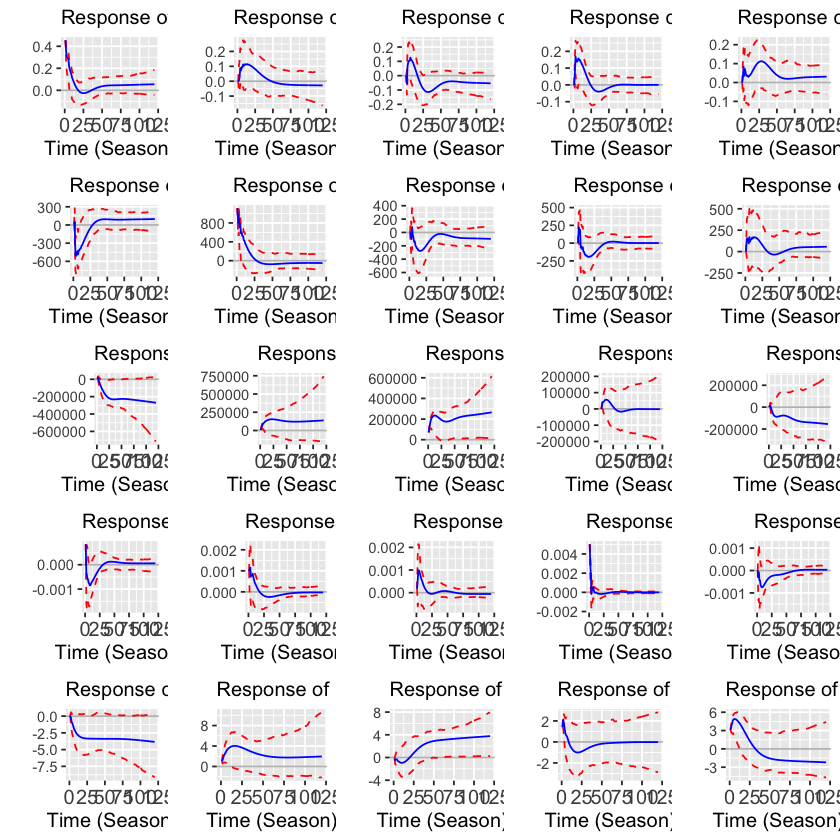

In [24]:
multiplot(p1,p2,p3,p4,p5,
          p6,p7,p8,p9,p10,
          p11,p12,p13,p14,p15,
          p16,p17,p18,p19,p20,
          p21,p22,p23,p24,p25,
          cols = 5)

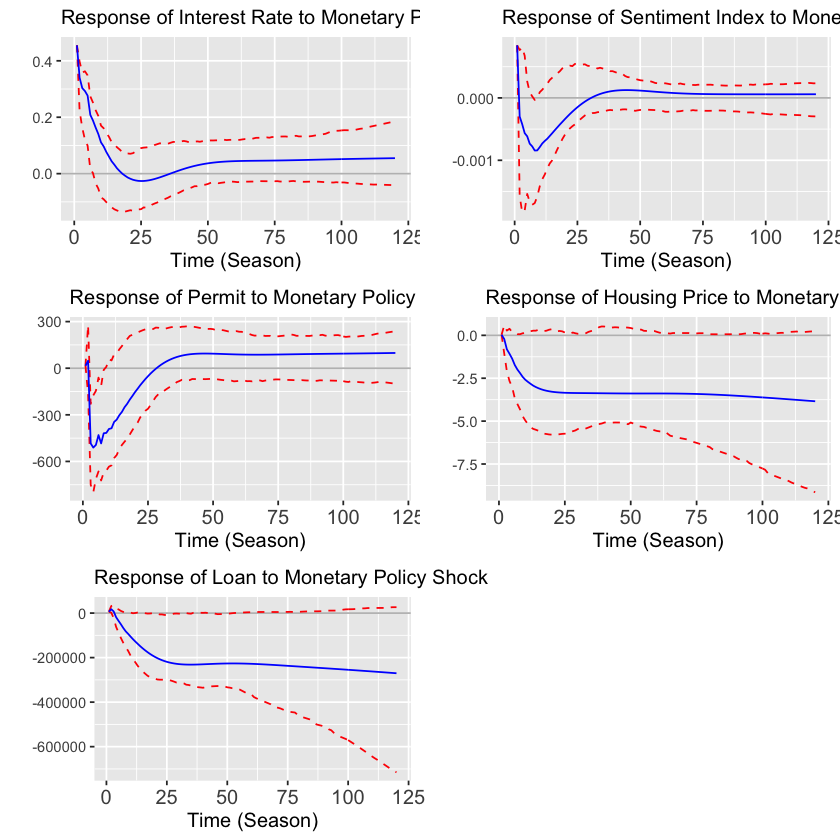

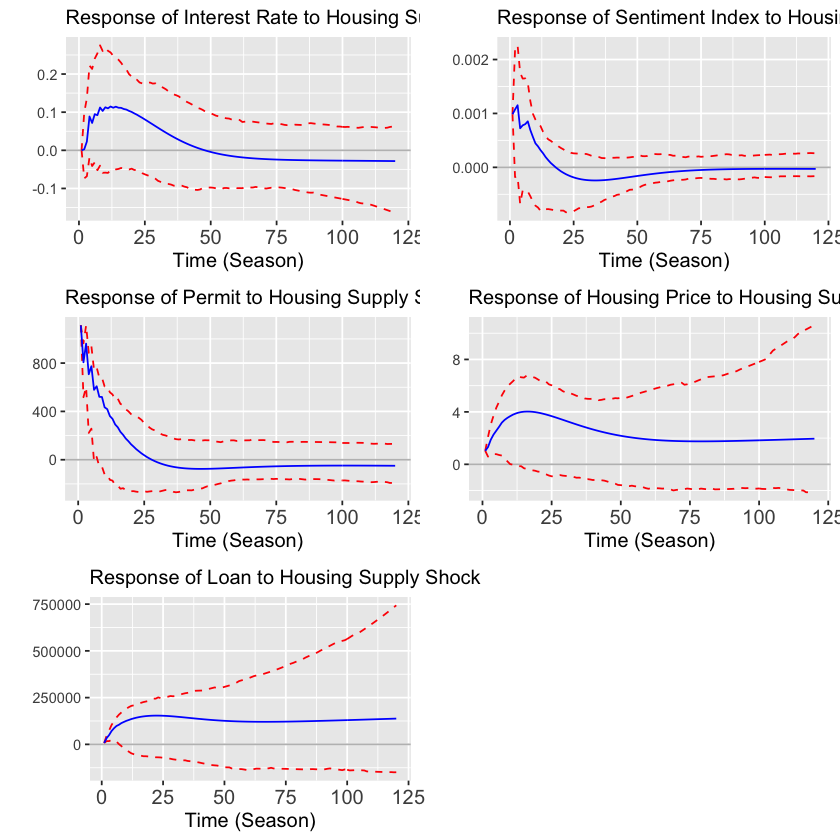

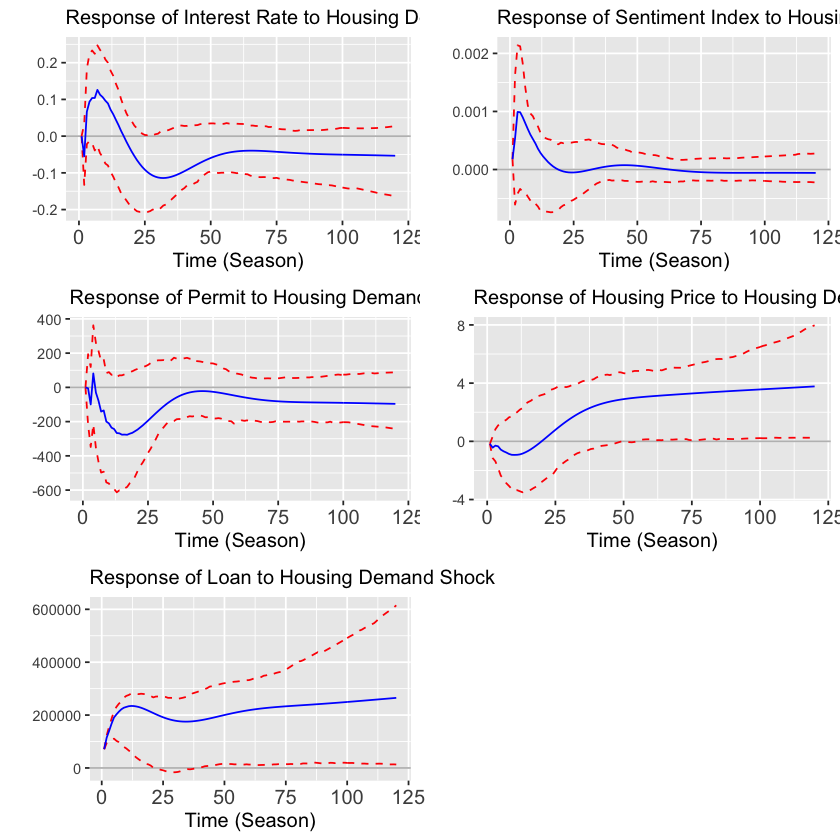

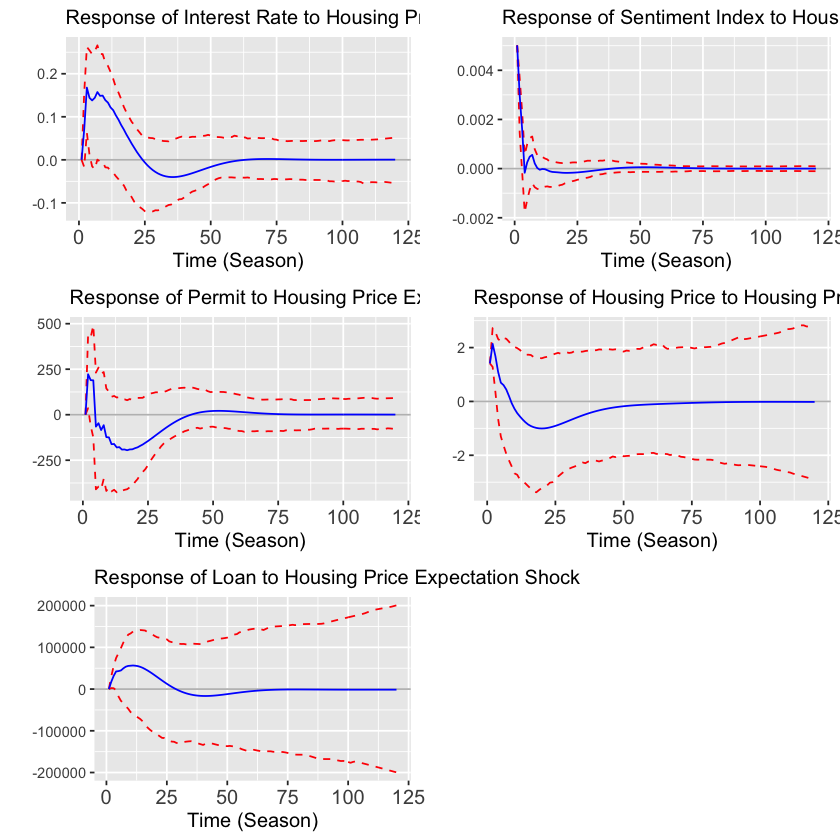

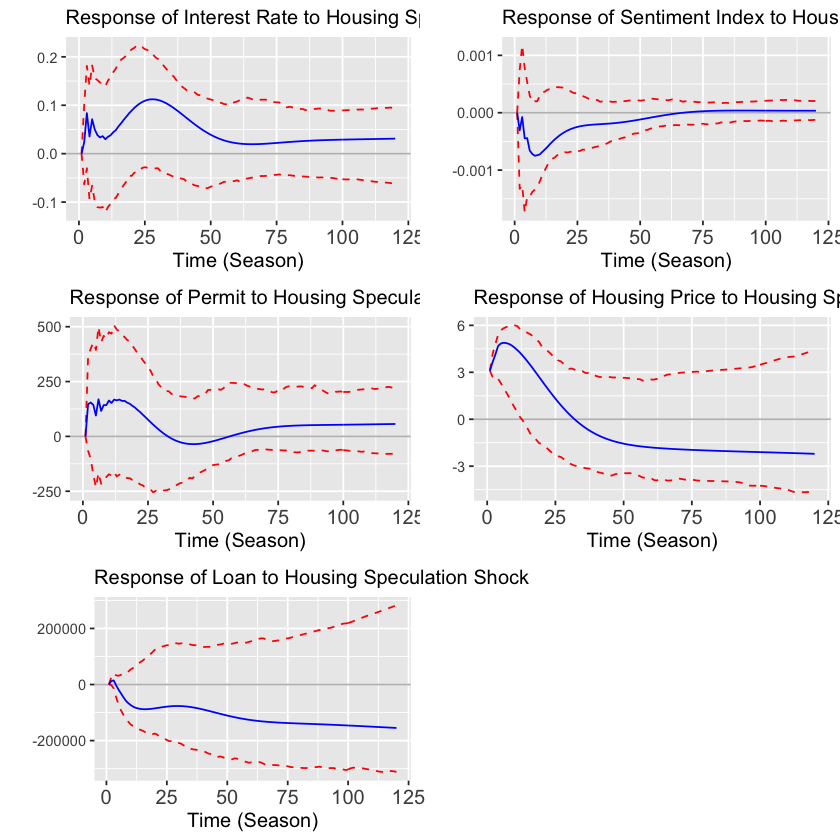

In [25]:
# For shock 1
multiplot(p1,p2,p3,p4,p5,
          cols = 2)
# For shock 2
multiplot(p6,p7,p8,p9,p10,
          cols = 2)
# For shock 3
multiplot(p11,p12,p13,p14,p15,
          cols = 2)
# For shock 4
multiplot(p16,p17,p18,p19,p20,
          cols = 2)
# For shock 5
multiplot(p21,p22,p23,p24,p25,
          cols = 2)

In [26]:
# save plot
# shock 1
ggsave(filename = "result/figure/SVAR_v5i4l4-chol_IRF_shock1.png", 
       plot = multiplot(p1,p2,p3,p4,p5, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 2
ggsave(filename = "result/figure/SVAR_v5i4l4-chol_IRF_shock2.png", 
       plot = multiplot(p6,p7,p8,p9,p10, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 3
ggsave(filename = "result/figure/SVAR_v5i4l4-chol_IRF_shock3.png", 
       plot = multiplot(p11,p12,p13,p14,p15, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 4
ggsave(filename = "result/figure/SVAR_v5i4l4-chol_IRF_shock4.png", 
       plot = multiplot(p16,p17,p18,p19,p20, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 5
ggsave(filename = "result/figure/SVAR_v5i4l4-chol_IRF_shock5.png", 
       plot = multiplot(p21,p22,p23,p24,p25, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

## Variance Decomposition

In [27]:
# `ddTheta` 放已經估出來的IRF (至於要放怎樣穩定的還要再想)
# m表示對於第幾個變數的變異數分解（如第五個是對房價的變異數分解）
SVAR_AB_VarDecomp <- VAR.svardecomp.AB(m = 5, By, VAR.P,
                                       AMat, BMat, h=120,
                                       Const=TRUE, ddTheta = SVAR_AB_IRF)
head(SVAR_AB_VarDecomp*100)
tail(SVAR_AB_VarDecomp*100)

h=1,0.008476828,8.347292,0.2332553,15.665563,75.74541
h=2,0.144042705,8.566669,0.6660214,20.140062,70.48320
h=3,1.244458276,11.122805,0.5365310,16.567143,70.52906
h=4,2.153648936,13.286796,0.4880432,12.304783,71.76673
h=5,3.108395474,15.175691,0.6285202,9.335951,71.75144
h=6,4.317564025,16.949332,0.7851232,7.409167,70.53881


h=115,35.91363,20.66890,24.89511,0.8570973,17.66526
h=116,35.94694,20.55957,25.02865,0.8482313,17.61662
h=117,35.97983,20.45192,25.16014,0.8394963,17.56861
h=118,36.01232,20.34592,25.28964,0.8308896,17.52122
h=119,36.04441,20.24154,25.41720,0.8224084,17.47445
h=120,36.07610,20.13872,25.54284,0.8140500,17.42828


In [28]:
# table
SVAR_VD <- (SVAR_AB_VarDecomp*100) %>% as.tibble()
SVAR_VD <- SVAR_VD %>% filter(row_number(V1) %in% c(1,2,4,8,12,20,40,60,80,120)) %>%
    mutate(period = c(1,2,4,8,12,20,40,60,80,120)) %>%
    select(period = period,
           mp = V1,
           hs = V2,
           hd = V3,
           expectation = V4,
           sp = V5) %>%
    mutate(period = as.character(period),
           mp = round(mp, digits = 2),
           hs = round(hs, digits = 2),
           hd = round(hd, digits = 2),
           expectation = round(expectation, digits = 2),
           sp = round(sp, digits = 2))
SVAR_VD

Warning message:
“`as.tibble()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


period,mp,hs,hd,expectation,sp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.01,8.35,0.23,15.67,75.75
2,0.14,8.57,0.67,20.14,70.48
4,2.15,13.29,0.49,12.30,71.77
8,6.63,20.47,1.09,5.01,66.79
12,10.80,25.68,1.48,3.06,58.98
20,17.36,32.68,1.17,2.66,46.13
40,28.14,36.39,4.97,2.36,28.14
60,32.49,30.77,12.80,1.69,22.25
80,34.36,25.93,18.53,1.28,19.90


In [29]:
library(xtable)

In [30]:
tab_VD <- xtable(SVAR_VD, caption= "房價指數的變異數分解", align=c("c","c","c","c","c","c","c"))
print(tab_VD, include.rownames=FALSE)

% latex table generated in R 3.6.2 by xtable 1.8-4 package
% Tue Feb  9 16:00:52 2021
\begin{table}[ht]
\centering
\begin{tabular}{cccccc}
  \hline
period & mp & hs & hd & expectation & sp \\ 
  \hline
1 & 0.01 & 8.35 & 0.23 & 15.67 & 75.75 \\ 
  2 & 0.14 & 8.57 & 0.67 & 20.14 & 70.48 \\ 
  4 & 2.15 & 13.29 & 0.49 & 12.30 & 71.77 \\ 
  8 & 6.63 & 20.47 & 1.09 & 5.01 & 66.79 \\ 
  12 & 10.80 & 25.68 & 1.48 & 3.06 & 58.98 \\ 
  20 & 17.36 & 32.68 & 1.17 & 2.66 & 46.13 \\ 
  40 & 28.14 & 36.39 & 4.97 & 2.36 & 28.14 \\ 
  60 & 32.49 & 30.77 & 12.80 & 1.69 & 22.25 \\ 
  80 & 34.36 & 25.93 & 18.53 & 1.28 & 19.90 \\ 
  120 & 36.08 & 20.14 & 25.54 & 0.81 & 17.43 \\ 
   \hline
\end{tabular}
\caption{房價指數的變異數分解} 
\end{table}


In [31]:
print(tab_VD, file="result/table/SVAR_v5i4l4-chol_VD.tex",
      include.rownames=FALSE,
      append=T, table.placement = "h",
      caption.placement="bottom", hline.after=seq(from=-1,to=nrow(tab_VD),by=1))

## Historical Decomposition

In [32]:
SVAR_AB_HistDecomp <- VAR.svarhist.AB(By, VAR.P, Amat, Bmat, CONST)
dim(SVAR_AB_HistDecomp)

[1] 119  25

In [33]:
#----- Base Project 估計 -----#
SVAR_AB_Hist.c0 = VAR.baseproject(By, VAR.P, CONST)
head(SVAR_AB_Hist.c0)
dim(SVAR_AB_Hist.c0)
dim(By)

1,7.180000,10465.00,1658483,0.005097271,98.1600
2,8.270000,17129.00,1728606,0.015780528,104.1600
3,7.766667,17332.00,1848549,0.016126075,106.6800
4,6.022667,20174.00,1965070,0.018451218,109.9900
,6.569042,17897.65,2110570,0.017517447,111.3490
,6.609205,20076.52,2294858,0.016701628,113.5949


[1] 119   5

[1] 119   5

In [34]:
# 實際時間序列與基本預測時間序列之偏離值
head(By-SVAR_AB_Hist.c0)

,interest_rate,permit,loan,Sentiment,hp
1,0.0000000,0.000,0.000,0.0000000000,0.000000
2,0.0000000,0.000,0.000,0.0000000000,0.000000
3,0.0000000,0.000,0.000,0.0000000000,0.000000
4,0.0000000,0.000,0.000,0.0000000000,0.000000
5,-0.1957088,1392.347,-1344.757,-0.0043687939,1.860992
6,1.1094620,4635.480,-91734.336,0.0006696575,4.225128


In [35]:
# 只有特定衝擊下的時間序列與基本預測時間序列之偏離值
## shock1: monetary policy shock
head(SVAR_AB_HistDecomp[,c(1,6,11,16,21)])

NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
-0.1957088,-6.630075,-2554.205,-0.0003624949,-0.01411683
1.1583749,23.492255,9550.895,0.0025451230,0.18626135


In [36]:
##左：baseline上 hp 的變化；右：shock1 對 hp 的衝擊
cbind((By-SVAR_AB_Hist.c0)[,5], 
      (SVAR_AB_HistDecomp[,c(1,6,11,16,21)])[,5])

1,0.000000,NA
2,0.000000,NA
3,0.000000,NA
4,0.000000,NA
5,1.860992,-0.01411683
6,4.225128,0.18626135
7,5.542659,-0.30289462
8,4.704711,-1.64177669
9,3.981116,-1.39739990
10,1.707900,-1.41401560
11,9.593927,-2.09165896


#### $R_t = 100 \times \frac{\text{特定衝擊下的時間序列-基本預測序列}}{\text{房價指數實際時間序列-基本預測序列}}$

### 對「房價」的歷史分解：monetary policy shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


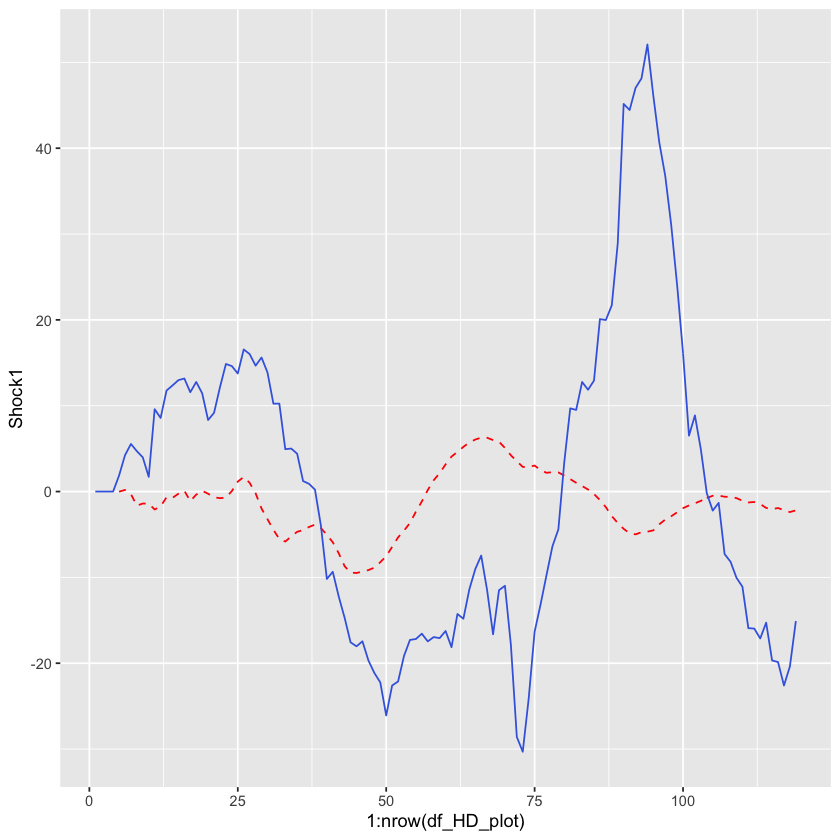

In [37]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(1,6,11,16,21)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock1")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock1), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')


### 對「房價」的歷史分解：supply shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


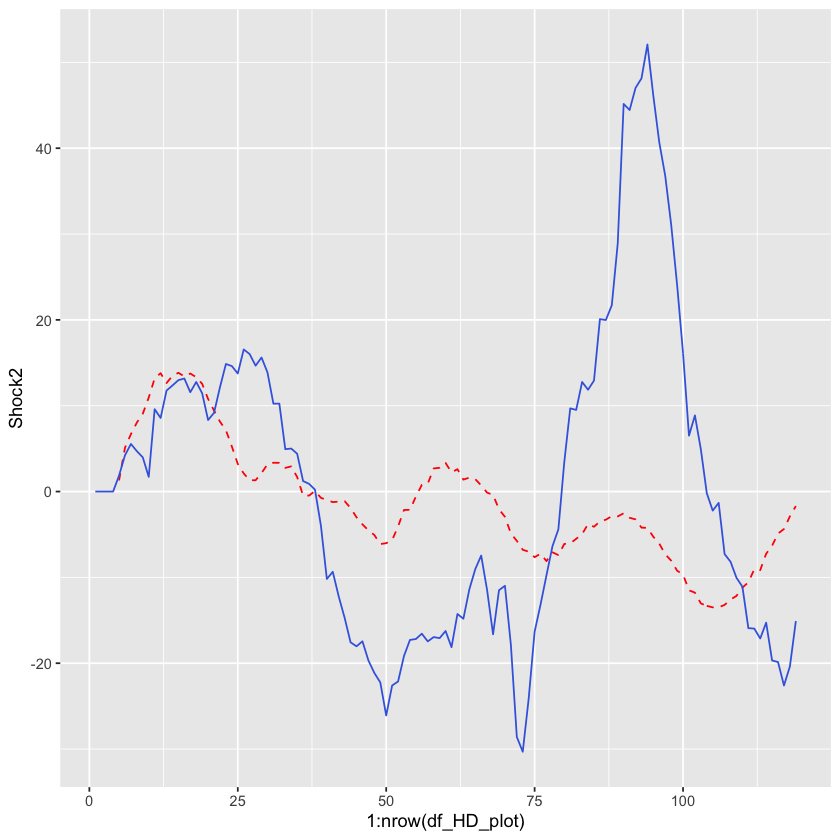

In [38]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(2,7,12,17,22)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock2")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock2), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：demand shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


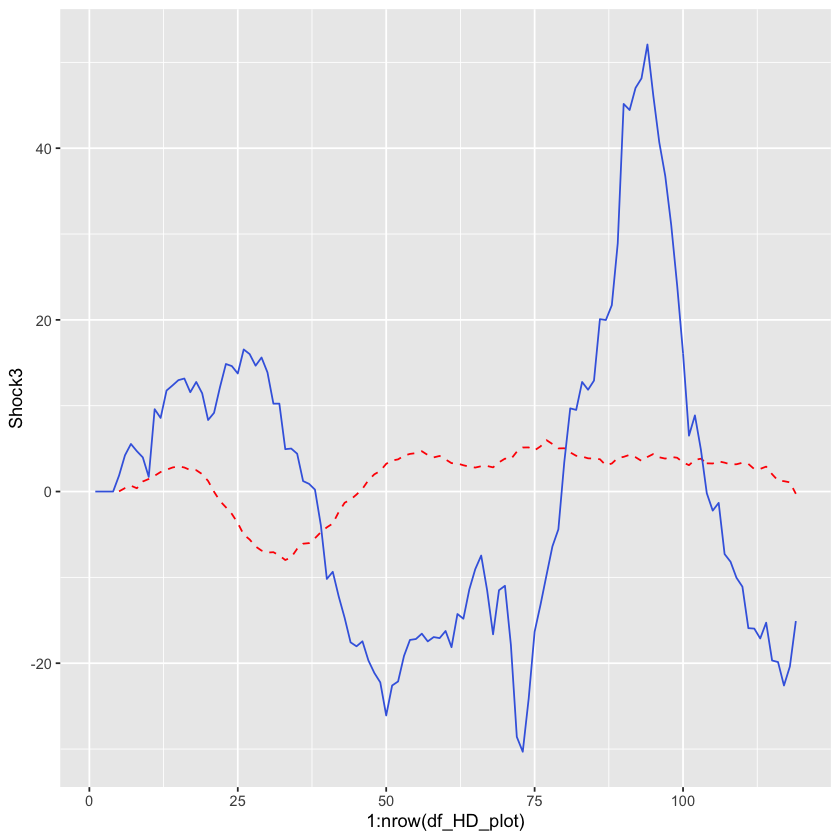

In [39]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(3,8,13,18,23)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock3")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock3), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：housing price expectation shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


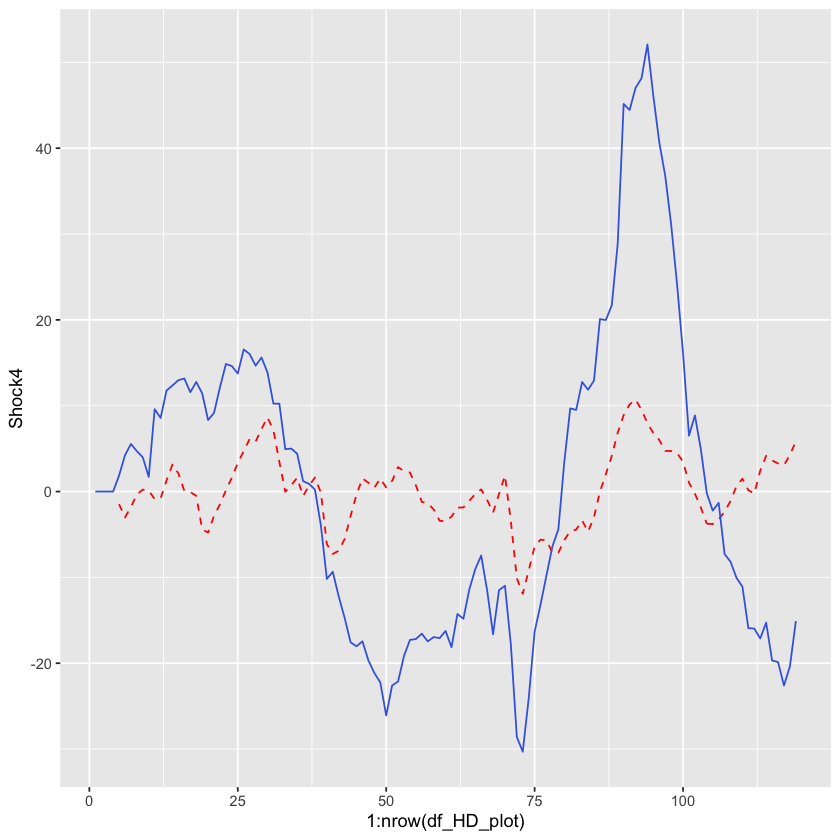

In [40]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(4,9,14,19,24)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock4")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock4), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：housing speculation shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


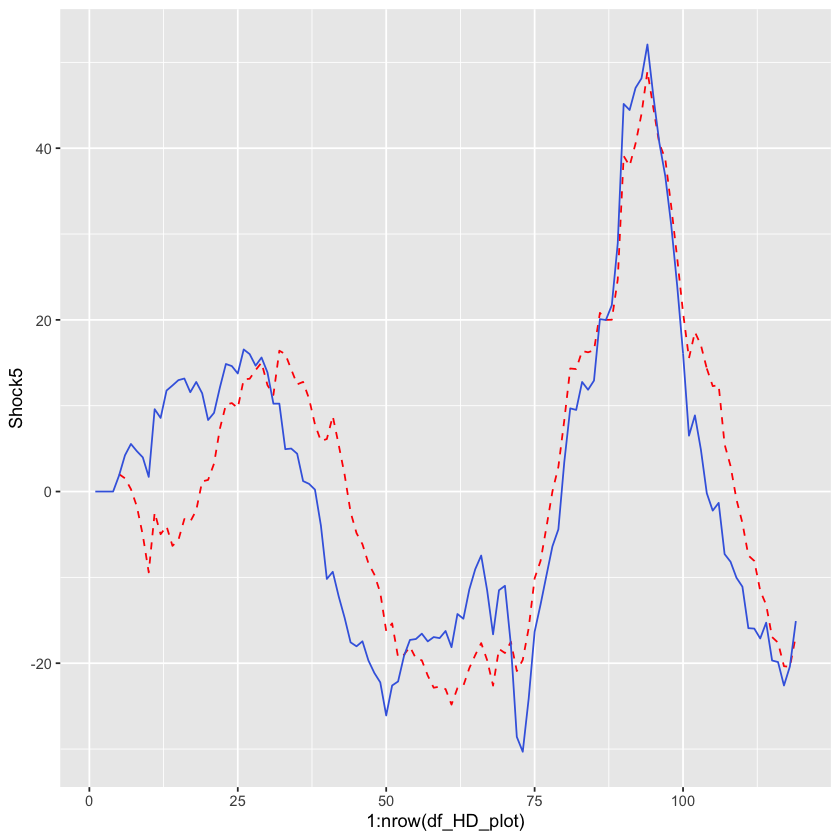

In [41]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(5,10,15,20,25)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock5")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock5), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### Table

In [42]:
t_label <- c()
year_label <- c()
season_label <- c()
year <- 1991
for(q in 1:119){
    if(q%%4==0){
        t_label <- c(t_label, paste0(year, "Q4", sep = ""))
        year_label <- c(year_label, year)
        season_label <- c(season_label, 4)
        year <- year+1
    }else{
        t_label <- c(t_label, paste0(year, "Q", q%%4, sep = ""))
        year_label <- c(year_label, year)
        season_label <- c(season_label, q%%4)
    }
}

In [43]:
df_HD <- bind_cols(t_label,
                   year_label,
                   season_label,
                   (By-SVAR_AB_Hist.c0)[,5],
                   SVAR_AB_HistDecomp[,21],
                   SVAR_AB_HistDecomp[,22],
                   SVAR_AB_HistDecomp[,23],
                   SVAR_AB_HistDecomp[,24],
                   SVAR_AB_HistDecomp[,25])
colnames(df_HD) <- c("Time", "Year", "Season", "BaseLine", "mp", "hs", "hd", "expectation", "sp")
tail(df_HD)

New names:
* NA -> ...1
* NA -> ...2
* NA -> ...3
* NA -> ...4
* NA -> ...5
* ...



Time,Year,Season,BaseLine,mp,hs,hd,expectation,sp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019Q2,2019,2,-15.27653,-1.905806,-7.245249,2.9047425,4.159062,-13.18928
2019Q3,2019,3,-19.68459,-2.046535,-6.315907,2.0204341,3.615715,-16.95829
2019Q4,2019,4,-19.86183,-1.923566,-4.891190,1.2792632,3.278336,-17.60468
2020Q1,2020,1,-22.59831,-2.164625,-4.365836,1.2080495,3.074292,-20.35019
2020Q2,2020,2,-20.37406,-2.392291,-2.885323,1.0704406,4.258267,-20.42515
2020Q3,2020,3,-15.08912,-2.189990,-1.689560,-0.2613808,5.848412,-16.79660


In [44]:
# 全樣本
HD_seq1 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
summarise(mp = mean(mp),
          hs = mean(hs),
          hd = mean(hd),
          expectation = mean(expectation),
          sp = mean(sp))

# 房價持平期
HD_seq2 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Year<2003) %>%
summarise(mp = mean(mp),
          hs = mean(hs),
          hd = mean(hd),
          expectation = mean(expectation),
          sp = mean(sp))

# 房價上升期
HD_seq3 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Year>=2003) %>%
summarise(mp = mean(mp),
          hs = mean(hs),
          hd = mean(hd),
          expectation = mean(expectation),
          sp = mean(sp))

In [45]:
xlab <- lubridate::yq(df_HD$Time)
df_HD$Time <- lubridate::yq(df_HD$Time)

In [46]:
# 全樣本
HD_seq1 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
summarise(mp = median(mp),
          hs = median(hs),
          hd = median(hd),
          expectation = median(expectation),
          sp = median(sp))

# 房價持平期
HD_seq2 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Year<2003) %>%
summarise(mp = median(mp),
          hs = median(hs),
          hd = median(hd),
          expectation = median(expectation),
          sp = median(sp))

# 房價上升期
HD_seq3 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Time>="2003-01-01" & Time<="2008-04-01") %>%
summarise(mp = median(mp),
          hs = median(hs),
          hd = median(hd),
          expectation = median(expectation),
          sp = median(sp))

# 房價上升期2
HD_seq4 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Time>="2009-07-01" & Time<="2014-04-01") %>%
summarise(mp = median(mp),
          hs = median(hs),
          hd = median(hd),
          expectation = median(expectation),
          sp = median(sp))

# 房價下跌期
HD_seq5 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Time>="2014-07-01" & Time<="2019-01-01") %>%
summarise(mp = median(mp),
          hs = median(hs),
          hd = median(hd),
          expectation = median(expectation),
          sp = median(sp))

# 房價上升期3
HD_seq6 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Time>="2019-04-01" & Time<="2020-07-01") %>%
summarise(mp = median(mp),
          hs = median(hs),
          hd = median(hd),
          expectation = median(expectation),
          sp = median(sp))

In [47]:
HD_seq <- bind_rows(HD_seq1, HD_seq2, HD_seq3, HD_seq4, HD_seq5, HD_seq6)
HD.table <- bind_cols(c("全樣本(1991Q1-2020Q3)","房價持平期(1991Q1-2002Q4)",
                        "房價上升期(2003Q1-2020Q3)","房價上升期2",
                       "房價下跌期", "房價上升期3"), HD_seq)
colnames(HD.table) <- c("樣本期間", 
                        "Montary Policy Shock", 
                        "Housing Supply Shock",
                        "Housing Demand Shock",
                        "Housing Price Expectation Shock",
                        "Housing Speculation Shock")
HD.table

New names:
* NA -> ...1



樣本期間,Montary Policy Shock,Housing Supply Shock,Housing Demand Shock,Housing Price Expectation Shock,Housing Speculation Shock
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
全樣本(1991Q1-2020Q3),-5.938274,19.319302,-10.786691,9.424445,86.33688
房價持平期(1991Q1-2002Q4),-3.878837,37.131878,1.513058,6.496997,35.35245
房價上升期(2003Q1-2020Q3),-16.002705,-1.789622,-23.870262,5.256470,135.37101
房價上升期2,-9.737102,-9.380926,11.566706,19.429766,91.79740
房價下跌期,7.591987,53.499511,-15.425760,14.772760,67.54916
房價上升期3,11.069242,21.972690,-5.893282,-19.634345,89.34376


In [48]:
HD_seq <- bind_rows(HD_seq1, HD_seq2, HD_seq3)
HD.table <- bind_cols(c("全樣本(1991Q1-2020Q3)","房價持平期(1991Q1-2002Q4)","房價上升期(2003Q1-2020Q3)"), HD_seq)
colnames(HD.table) <- c("樣本期間", 
                        "Montary Policy Shock", 
                        "Housing Supply Shock",
                        "Housing Demand Shock",
                        "Housing Price Expectation Shock",
                        "Housing Speculation Shock")
HD.table

New names:
* NA -> ...1



樣本期間,Montary Policy Shock,Housing Supply Shock,Housing Demand Shock,Housing Price Expectation Shock,Housing Speculation Shock
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
全樣本(1991Q1-2020Q3),-5.938274,19.319302,-10.786691,9.424445,86.33688
房價持平期(1991Q1-2002Q4),-3.878837,37.131878,1.513058,6.496997,35.35245
房價上升期(2003Q1-2020Q3),-16.002705,-1.789622,-23.870262,5.256470,135.37101


In [49]:
# 生出table
tab_HD <- xtable(HD.table, caption= "歷史分解下各衝擊的解釋力比率(%)", align=c("c","c","c","c","c","c","c"))
print(tab_HD, include.rownames=FALSE)

% latex table generated in R 3.6.2 by xtable 1.8-4 package
% Tue Feb  9 16:00:59 2021
\begin{table}[ht]
\centering
\begin{tabular}{cccccc}
  \hline
樣本期間 & Montary Policy Shock & Housing Supply Shock & Housing Demand Shock & Housing Price Expectation Shock & Housing Speculation Shock \\ 
  \hline
全樣本(1991Q1-2020Q3) & -5.94 & 19.32 & -10.79 & 9.42 & 86.34 \\ 
  房價持平期(1991Q1-2002Q4) & -3.88 & 37.13 & 1.51 & 6.50 & 35.35 \\ 
  房價上升期(2003Q1-2020Q3) & -16.00 & -1.79 & -23.87 & 5.26 & 135.37 \\ 
   \hline
\end{tabular}
\caption{歷史分解下各衝擊的解釋力比率(%)} 
\end{table}


In [50]:
print(tab_HD, include.rownames=FALSE,
      file="result/table/SVAR_v5i4l4-chol_HD.tex",
      append=T, table.placement = "h",
      caption.placement="bottom", hline.after=seq(from=-1,to=nrow(tab_HD),by=1))

### Save Plot

xlab <- lubridate::yq(df_HD$Time)

In [51]:
# plot 1
figure_HD.1 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = mp, color = "Monetary Policy Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Monetary Policy Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('royalblue','red'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 2
figure_HD.2 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = hs, color = "Housing Supply Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Supply Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 3
figure_HD.3 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = hd, color = "Housing Demand Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Demand Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())


# plot 4
figure_HD.4 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = expectation, color = "Housing Price Expectation Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Price Expectation Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 5
figure_HD.5 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = sp, color = "Housing Speculation Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Speculation Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

In [52]:
# save shock 1
ggsave(filename = "result/figure/SVAR_v5i4l4-chol_HD_shock1.png", 
       plot = figure_HD.1,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 2
ggsave(filename = "result/figure/SVAR_v5i4l4-chol_HD_shock2.png", 
       plot = figure_HD.2,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 3
ggsave(filename = "result/figure/SVAR_v5i4l4-chol_HD_shock3.png", 
       plot = figure_HD.3,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 4
ggsave(filename = "result/figure/SVAR_v5i4l4-chol_HD_shock4.png", 
       plot = figure_HD.4,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 5
ggsave(filename = "result/figure/SVAR_v5i4l4-chol_HD_shock5.png", 
       plot = figure_HD.5,
       width = 15, height = 10, units = "cm",
       device = "png")

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
